In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_blobs

In [16]:
samples,target = make_blobs(n_samples=1500,n_features=2,centers=3)

In [17]:
samples.shape

(1500, 2)

In [18]:
target.shape

(1500,)

Text(0,0.5,'feature2')

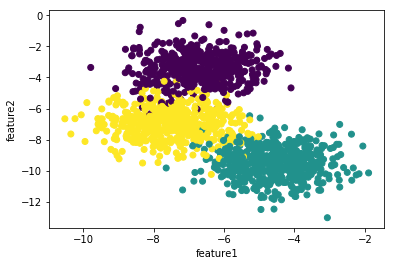

In [19]:
plt.scatter(samples[:,0],samples[:,1],c=target)
plt.xlabel('feature1')
plt.ylabel('feature2')

In [10]:
# 拆分数据集
from sklearn.model_selection import train_test_split

In [11]:
# 原则上任何数据集在进行训练之前，必须要进行“归一化”处理
# 先查看没有归一化的数据集能达到的算法评分
samples

array([[-10.27688883,  -7.85908329],
       [ -6.15626017,  -8.92397953],
       [ -5.7004537 ,  -8.38968215],
       [ -5.98733314,  -8.43552484],
       [ -5.52303613, -10.71857987],
       [ -4.79251371,  -9.43518444],
       [  4.35094655,   9.68503397],
       [  5.13017141,   7.29689336],
       [ -9.39956223,  -8.26388314],
       [-10.23182289,  -7.12633193],
       [ -9.84642756,  -8.3632817 ],
       [ -8.97835625,  -7.68135568],
       [ -8.57735499,  -7.63542226],
       [  5.5878362 ,   9.50905797],
       [ -6.99514849, -10.17497021],
       [ -8.78169548,  -9.06561058],
       [  5.10129247,   5.46959771],
       [  5.20039058,   7.94037546],
       [  5.11246086,   7.70755473],
       [-10.34427195,  -7.406896  ],
       [  5.37208663,   6.12671796],
       [ -7.71747697,  -6.68347761],
       [-11.04189618,  -7.30277409],
       [  5.39815557,   6.91729326],
       [  6.68352824,   6.94564338],
       [ -7.13983056,  -8.36110223],
       [  5.60356471,   8.00634463],
 

In [20]:
# 默认测试集的比例为0.25
X_train,X_test,y_train,y_test = train_test_split(samples,target,random_state=1)

In [ ]:
# 可以选择的模型有knn,logistic
# knn  距离测量   n_neighbors
# logistic 概率预测  C penti 惩罚项 l1 l2 特征工程的范畴
# 超参  函数（API）层面
# 模型参数 f(x) = w*x + b （优化数据集来间接调整）

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [24]:
X_train.shape

(1125, 2)

In [32]:
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train,y_train).score(X_test,y_test)

0.9813333333333333

In [42]:
logistic = LogisticRegression(C=0.4)
logistic.fit(X_train,y_train).score(X_test,y_test)

0.976

In [ ]:
# 从算法评分上看，knn要优于logistic

In [46]:
# 查看两种不同的算法模型的分类边界
x = np.linspace(samples[:,0].min(),samples[:,0].max(),300)
y = np.linspace(samples[:,1].min(),samples[:,1].max(),300)

# 网格处理
xx,yy = np.meshgrid(x,y)

X_test = np.c_[xx.ravel(),yy.ravel()]

In [47]:
X_test.shape

(90000, 2)

In [48]:
y1_ = knn.predict(X_test)
y2_ = logistic.predict(X_test)

In [53]:
X_test[:,0].shape

(90000,)

In [51]:
X_test.shape

(90000, 2)

In [56]:
from matplotlib.colors import ListedColormap

cmap1 = ListedColormap(['#aa00ff','#ffaa00','#00ffaa'])
cmap2 = ListedColormap(['#0000ff','#ff0000','#00ff00'])

Text(0.5,1,'logistic')

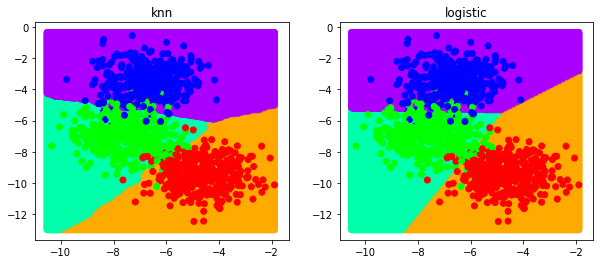

In [58]:
plt.figure(figsize=(10,4))
axes1 = plt.subplot(1,2,1)
axes1.scatter(X_test[:,0],X_test[:,1],c=y1_,cmap=cmap1)
axes1.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cmap2)
axes1.set_title('knn')

axes2 = plt.subplot(1,2,2)
axes2.scatter(X_test[:,0],X_test[:,1],c=y2_,cmap=cmap1)
axes2.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cmap2)
axes2.set_title('logistic')

In [60]:
%timeit knn.predict(X_test)

591 ms ± 44.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [61]:
%timeit logistic.predict(X_test)

6.68 ms ± 723 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
